In [2]:
import sys
sys.path.append('../')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu

# Jetzt kannst du das Modul aus dem übergeordneten Verzeichnis importieren
from gold_standard import * 

In [12]:
# Read XML-Files
# df_eafc = pd.read_xml('../../Football-Project/data/xml-files/eafc_final.xml')
df_fm23 = pd.read_xml('../../Football-Project/data/xml-files/fm23_final.xml')
df_tm = pd.read_xml('../../Football-Project/data/xml-files/tm_final.xml')

# Take only a sample of the whole dataset. Saves compute power
subset_size = 900
df_tm_sampled = df_tm.sample(n=subset_size, random_state=42)

In [13]:
# Create similarity matrixes for differenct similarity functions and columns
similarity_matrix_name = get_similarity_matrix(leventstein_similarity, df_tm_sampled['name'], df_fm23['name'])
similarity_matrix_date = get_similarity_matrix(date_similarity, df_tm_sampled['birthdate'], df_fm23['birthdate'])
#similarity_matrix_club = get_similarity_matrix(leventstein_similarity, df_tm_sampled['club'], df_fm23['club'])

<Axes: >

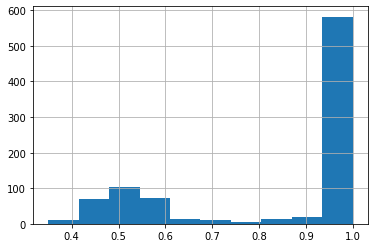

In [14]:
# df_name = create_result(df_fm23_sampled, df_eafc, similarity_matrix_name)
# df_date = create_result(df_fm23_sampled, df_eafc, similarity_matrix_date)

# Create the result dataframe and weight the importances of similarities.
# Name has a very high probability, because there are a lot name abbreviations in the data resulting in lower similarity scores
df = create_result(df_tm_sampled, df_fm23, (1.4*similarity_matrix_name) + (0.6*similarity_matrix_date), 2).sort_values(by=['score'], ascending=False)

# Plot histogram to see the distribution of the similarity scores.
df.score.hist()

### Figure out suitable values for perfect_match_at_least_threshhold and corner_case_at_least_threshhold

In [15]:
pd.set_option('display.max_rows', None)
# display(df)

In [24]:
# create datasets for perfect_matches, corner_cases, non_matches
perfect_match_at_least_threshhold = 1
corner_case_at_least_threshhold = 0.55

perfect_matches = get_perfect_matches(df, perfect_match_at_least_threshhold)
corner_cases = get_corner_cases(df, perfect_match_at_least_threshhold, corner_case_at_least_threshhold)
non_matches = get_non_matches(df, corner_case_at_least_threshhold)

print(f"Length of perfect_matches: {len(perfect_matches)}, {(len(perfect_matches) / len(df) * 100):.2f}%")
print(f"Length of corner cases: {len(corner_cases)}, {(len(corner_cases) / len(df) * 100):.2f}%")
print(f"Length of non_matches {len(non_matches)}, {(len(non_matches) / len(df) * 100):.2f}%")

Length of perfect_matches: 544, 60.44%
Length of corner cases: 162, 18.00%
Length of non_matches 194, 21.56%


In [23]:
# Save all perfect matches
perfect_matches.to_csv('perfect_matches_tm_fm_v2.csv', index=False)

# Save corner cases to disk
max_corner_cases = None
corner_cases.sort_values(by=['score'], ascending=True).head(max_corner_cases).to_csv('corner_cases_tm_fm_v2.csv', index=False)

# Save non matches to disk
non_matches.to_csv('non_matches_tm_fm_v2.csv', index=False)